In [1]:
import numpy
import csv
import re
import pandas as pd
b = '../Data/'
path_value = b + r"data - eurusd.csv"

In [2]:
import warnings
warnings.filterwarnings("default")

In [5]:
a = pd.ExcelFile(b + "currencies_fixed_4.xlsx")
tables = []
for sheet in a.sheet_names:
    tables.append(pd.read_excel(b + "currencies_fixed_4.xlsx", sheet))

In [6]:
result_table = pd.concat(tables)

In [7]:
text = 'Text EN'

In [8]:
result_table

,№,Currency,Author,Author ID,Publication Date (RU),Publication Time (RU),DateTime (RU),Link RU,Title RU,Text RU,Recommendations RU,Publication Date (EN),Publication Time (EN),DateTime (EN),Link EN,Title EN,Text EN,Recommendations EN\n,Nearest Closing Time,Closing Value
0,0,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,18.07.19,07:41,201907180741,https://www.instaforex.com/forex_analysis/147884,"Analysis of AUD/JPY for July 18, 2019: AUD to ...",The Australian dollar started the week with we...,-\n,201907180741,7569
1,1,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,16.05.19,08:49,201905160849,https://www.instaforex.com/forex_analysis/142903,AUDJPY: AUD to regain momentum over JPY for sh...,AUD is struggling to gain momentum over JPY re...,-\n,201905160849,7569
2,2,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,19.04.19,06:01,201904190601,https://www.instaforex.com/forex_analysis/140750,"Fundamental Analysis of AUD/JPY for April 19, ...",AUD/JPY has been rejected off the 80.50 resist...,-\n,201904190601,8000
3,3,AUD/JPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,11.04.19,12:49,201904111249,https://www.instaforex.com/forex_analysis/140128,"Fundamental Analysis of AUD/JPY for April 11, ...",The Australian economy is currently going thro...,-\n,201904111249,7951
4,4,AUDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,29.03.19,11:48,201903291148,https://www.instaforex.com/forex_analysis/139053,AUDJPY consolidates as both economies struggle,The Australian economy is experiencing a decl...,-\n,201903291148,7854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,06.06.17,11:28,201706061128,https://www.instaforex.com/forex_analysis/92601,"Fundamental Analysis of USDJPY for June 6, 2017",After rejecting off the resistance of 111.60 r...,-\n,201706061128,10963
195,195,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,08.05.17,14:32,201705081432,https://www.instaforex.com/forex_analysis/91448,"Fundamental Analysis of USDJPY for May 8, 2017",USD/JPY has been in a bullish non-volatile tre...,-\n,201705081432,11261
196,196,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,26.04.17,17:13,201704261713,https://www.instaforex.com/forex_analysis/90996,"USDJPY Fundamental Analysis April 26, 2017",USDJPY has been in a bullish trend since the s...,-\n,201704261713,11151
197,197,USDJPY,"InstaForex Analyst,Analytical expert of InstaF...",12,-,-,-,-,-,-,-,10.03.17,06:00,201703100600,https://www.instaforex.com/forex_analysis/89088,"USDJPY Fundamental Analysis March 10, 2017",USD/JPY has shown a good amount of strength re...,-\n,201703100600,11518


In [9]:
d = result_table[(result_table[text] != '-') & (result_table['Recommendations EN\n'] != '-\n')]

In [10]:
x = d[[text, 'Recommendations EN\n']]
x

,Text EN,Recommendations EN\n
4,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a new round of do...
5,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a new round of do...
7,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a new round of do...
10,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair started an upward movement an...
13,"""4-hour timeframeTechnical details:Higher line...",The EUR/USD pair has started a round of correc...
...,...,...
607,"""4-hour timeframe Technical data:The upper ch...",The GBP/USD currency pair continues to trade n...
609,"""4-hour timeframe Technical data: The upper c...",The GBP/USD pair continues to trade inside the...
610,"""4-hour timeframe Technical data: The upper c...",The GBP/USD currency pair continues to trade s...
622,"""4-hour timeframe Technical data:The upper ch...","""The GBP/USD currency pair continues to move s..."


In [11]:
patterns = {'buy orders should be': -1,
                'sell orders should be': 1,
                'it is recommended to buy': -2,
                'it is recommended to sell': 2,
               'it is recommended to consider buying': -2,
                'it is recommended to consider selling': 2,
                'you can return to sell': 1,
                'you can return to buy': -1,
                'it is recommended to return to buying': -2,
                'it is recommended to return to selling': 2,
                'it is recommended to open new sell orders': 2,
                'it is recommended to open new buy orders': -2,
                'it is recommended to consider sell orders': 2,
                'it is recommended to consider buy orders': -2,
                'It is recommended to consider short positions': 2,
                'It is recommended to consider long positions': -2,
                'Buy orders are recommended': -2,
                'Sell orders are recommended': 2,
                'It is also recommended to consider buying': -2,
                'It is also recommended to consider selling': 2,
                'purchases of the pair will be': -1,
                'sales of the pair will be': 1,
                'Sales of the pair are possible now': 1,
                "purchases of the pair are possible now": -1,
                'The sale of the pair will be possible': 1,
                "It is recommended to open buy orders": -2,
                "It is recommended to open sell orders": 2,
                "it is now recommended to open buy orders": -2,
                "it is now recommended to open sell orders": 2,
                "It is recommended to re-consider options for opening long positions": -1,
                "It is recommended to re-consider options for opening short positions": 1,
                "You will not be able to buy": -1,
                "You will not be able to sell": 1,
                "You can sell the pair": 1,
                "You can buy the pair": -1,
                "You can purchase the pair": -1,
                "It will be possible to return to sell positions": 1,
                "It will be possible to return to buy positions": -1,
                "Short positions can be considered": 1,
                "Long positions can be considered": -1
               }
def label_data(x, column, patterns):   
    cnt = 0
    labels = [0] * len(x)
    for i, text in enumerate(x[column]):
        for pattern in patterns:
            if pattern.lower() in '. '.join(text.lower().split('. ')[-5:][::-1]):
                cnt += 1
                labels[i] = patterns[pattern]
                break
    print(f'Found {cnt} texts to label')
    y = x.copy()
    y['labels'] = labels
    return y 

In [12]:
y = label_data(x, 'Recommendations EN\n', patterns)

Found 536 texts to label


In [13]:
new_patterns = {
    'Bullish Divergence': 2,
    'Bearish Divergence': -2,
    'Bullish Continuous Divergence': 2,
    'Bearish Continuous Divergence': -2,
    'Bearish Hidden Divergence': -2,
    'Bullish Hidden Divergence': 2,
    'bearish pressure': -2,
    'bullish pressure': 2,
    'bearish momentum': -2,
    'bullish momentum': 2,
    'bullish bias': 2,
    'bearish bias': -2,
    'bearish move': -2,
    'bullish move': 2,
    'buying with': 2,
    'selling with': -2
}

In [14]:
unparsed_texts = result_table[(result_table[text] != '-') & (result_table['Recommendations EN\n'] == '-\n')]

In [15]:
technical_view_texts = unparsed_texts[unparsed_texts[text].apply(lambda x: 'technical view' in x)]
y1 = label_data(technical_view_texts, text, new_patterns)

Found 714 texts to label


In [16]:
text = 'Text EN'
target = 'labels'
labeled_data = pd.concat([y, y1])[[text, target]]

In [17]:
labeled_data[labeled_data['labels'] != 0].to_csv("label_data.csv", index=False, header=True)

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
transformation_dictionary = {}
snowball = SnowballStemmer(language="english")
def apply_tokenizing(t):
    text = re.sub('[^A-Za-z ]', " ", t).lower()
    tokenized = word_tokenize(text, language="english")
    stops = stopwords.words("english")
    filtered_tokens = []
    for token in tokenized:
        if token not in stops:
            filtered_tokens += [token]
    return " ".join(filtered_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zajtsevan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/zajtsevan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
labeled_data[text] = labeled_data[text].apply(apply_tokenizing)
final_data = labeled_data

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [69]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install accelerate -U

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/1a/d1/3bba59606141ae808017f6fde91453882f931957f125009417b87a281067/transformers-4.34.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for huggingface-hub<1.0,>=0.16.4 from https://files.pythonhosted.org/packages/ef/b5/b6107bd65fa4c96fdf00e4733e2fe5729bb9e5e09997f63074bb43d3ab28/huggingface_hub-0.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.15,>=0.14 from https://files.pythonhosted.org/packages/a7/7b/c1f643eb086b6c5c33eef0c3752e37624bd23e4cbc9f1332748f1c6252d1/tokenizers-0.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/20/4e/878b080dbda92666233ec6f3

In [165]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [21]:
final_data = final_data.drop_duplicates()
final_data_without_na = final_data

In [22]:
final_data_without_na.shape

(1467, 2)

In [23]:
labels_mapper = {
    -2: 0,
    -1: 1,
    0: 2,
    1: 3,
    2: 4
}

def map_labels(x):
    return labels_mapper[x]

In [24]:
final_data_without_na['labels'] = final_data_without_na['labels'].apply(map_labels)
final_data_without_na['labels'].value_counts()

/tmp/ipykernel_2842970/467938242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_without_na['labels'] = final_data_without_na['labels'].apply(map_labels)


labels
0    627
4    489
2    220
3     73
1     58
Name: count, dtype: int64

In [25]:
final_data_without_na

,Text EN,labels
4,hour timeframetechnical details higher linear ...,1
5,hour timeframetechnical details higher linear ...,1
7,hour timeframetechnical details higher linear ...,1
10,hour timeframetechnical details higher linear ...,3
13,hour timeframetechnical details higher linear ...,1
...,...,...
191,usd jpy currently edge resistance area jpy los...,4
192,usd jpy shown bullish pressure recent jpy repo...,4
193,usd jpy pair bearish pressure recently price b...,4
196,usdjpy bullish trend since start week currentl...,2


In [26]:
X, y = final_data_without_na[text], final_data_without_na[target]

In [44]:
# !pip install datasets
# !pip install evaluate
# !pip install accelerate -U

In [166]:
import torch
from datasets import Dataset
import numpy as np
import evaluate
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer)
from tqdm.auto import tqdm
from torch.optim import AdamW
from torch.utils.data import DataLoader
# for param in model.parameters(): # transfer learning
#     param.requires_grad = False
num_of_out_classes = 5
sentiment_predictor = torch.nn.Linear(model.classifier.in_features, num_of_out_classes)
model.classifier = sentiment_predictor
model.num_labels = num_of_out_classes
device = "cuda:5"
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6, betas=(0.9, 0.999))

def tokenize(text):
    return tokenizer(text['Text EN'], padding='max_length', truncation=True, return_tensors='pt')

def preprocess(dataset):
    data = Dataset.from_pandas(dataset.set_index(text))
    data = data.map(tokenize)
    data = data.remove_columns(['Text EN'])
    data.set_format('torch')
    return data


train, test = train_test_split(final_data_without_na, test_size=0.15, random_state=1)
train = preprocess(train)
test = preprocess(test)

train_dataloader = DataLoader(train, shuffle=True, batch_size=8)
test_dataloader = DataLoader(test, batch_size=8)

num_epochs = 20
num_training_steps = num_epochs * len(train_dataloader)

Map:   0%|          | 0/1246 [00:00<?, ? examples/s]

Map:   0%|          | 0/221 [00:00<?, ? examples/s]

In [167]:
torch.cuda.empty_cache()

In [168]:
num_epochs = 40

In [169]:
from transformers import get_scheduler
lr_scheduler = get_scheduler(
	name = 'linear',
	optimizer = optimizer,
	num_warmup_steps = 0,
	num_training_steps = num_training_steps)

def preprocess_batch(batch):
    for key in batch:
        if len(batch[key].shape) > 1 and batch[key].shape[1] == 1:
            batch[key] = batch[key].squeeze(1)
    for key in batch:
        batch[key] = batch[key].to(device)

for epoch in tqdm(range(num_epochs)):
    model.train()
    for batch in tqdm(train_dataloader, leave=False):
        preprocess_batch(batch)
        # print(list(map(lambda x: x[1].shape, batch.items())))
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

    metric = evaluate.load('f1')

    model.eval()
    for batch in tqdm(test_dataloader, leave=False):
        preprocess_batch(batch)
        with torch.no_grad():
            outputs = model(**batch)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        metric.add_batch(predictions=predictions, references=batch['labels'])

    print(f'epoch {epoch} -', metric.compute(average='micro'))

model.save_pretrained('./')

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 0 - {'f1': 0.3936651583710407}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 1 - {'f1': 0.4751131221719457}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 2 - {'f1': 0.5656108597285068}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 3 - {'f1': 0.5882352941176471}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 4 - {'f1': 0.579185520361991}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 5 - {'f1': 0.6018099547511312}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 6 - {'f1': 0.6108597285067874}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 7 - {'f1': 0.6742081447963801}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 8 - {'f1': 0.665158371040724}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 9 - {'f1': 0.6742081447963801}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 10 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 11 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 12 - {'f1': 0.6561085972850679}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 13 - {'f1': 0.6606334841628959}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 14 - {'f1': 0.665158371040724}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 15 - {'f1': 0.6561085972850679}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 16 - {'f1': 0.665158371040724}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 17 - {'f1': 0.6787330316742082}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 18 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 19 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 20 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 21 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 22 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 23 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 24 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 25 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 26 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 27 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 28 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 29 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 30 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 31 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 32 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 33 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 34 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 35 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 36 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 37 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 38 - {'f1': 0.669683257918552}


  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

epoch 39 - {'f1': 0.669683257918552}


In [ ]:
def make_prediction(text):
    batch = tokenizer(text, padding='max_length', truncation=True, return_tensors='pt')
    preprocess_batch(batch)
    with torch.inference_mode():
        answer = model(**batch).logits
    return torch.argmax(answer, dim=-1)

make_prediction("")

In [163]:
from sklearn.model_selection import train_test_split
X, y = final_data_without_na[text], final_data_without_na[target]
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.85, random_state=1)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv_bigram, cv_word = CountVectorizer(ngram_range=(2,3)), CountVectorizer(ngram_range=(1,2))
tfid_bigram, tfid_word = TfidfVectorizer(ngram_range=(2, 3)), TfidfVectorizer(ngram_range=(1, 2))

X, X1, X_cv_bigram, X_cv_word = tfid_bigram.fit_transform(x_train), tfid_word.fit_transform(x_train), cv_bigram.fit_transform(x_train), cv_word.fit_transform(x_train)
X_test, X_test1, X_test_cv_bigram, X_test_cv_word = tfid_bigram.transform(x_valid), tfid_word.transform(x_valid), cv_bigram.transform(x_valid), cv_word.transform(x_valid)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import f1_score
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', SGDClassifier(n_jobs=-1))])
param_grid = {

        'SGD__alpha': np.logspace(-3, 2, num=5)
}

crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', SGDClassifier(n_jobs=-1))]),
             param_grid={'SGD__alpha': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02])},
             scoring=make_scorer(f1_score, average=macro))

In [30]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.6229105540904292,
 {'SGD__alpha': 0.001},
 0.5440519223775099,
 {'SGD__alpha': 0.001},
 0.6229105540904292,
 {'SGD__alpha': 0.31622776601683794},
 0.6938703969010179,
 {'SGD__alpha': 0.31622776601683794})

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(SGDClassifier(alpha=0.001, n_jobs=1, random_state=12), X_test_cv_bigram, y_valid, cv=5)

array([0.51111111, 0.59090909, 0.70454545, 0.59090909, 0.59090909])

# SGD

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
best = SGDClassifier(alpha = crs.best_params_['SGD__alpha'])
best1 = SGDClassifier(alpha = crs1.best_params_['SGD__alpha'], random_state=12)
best2 = SGDClassifier(alpha = crs2.best_params_['SGD__alpha'], random_state=12)
best3 = SGDClassifier(alpha = crs3.best_params_['SGD__alpha'], random_state=12)
best.fit(X, y_train), best1.fit(X1, y_train), best2.fit(X_cv_bigram, y_train), best3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(best.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(best1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(best2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(best3.predict(X_test_cv_word), y_valid, average="macro")}')

TF-IDF bigram 0.6946634962003663
TF-IDF word 0.5499425296564151
CountVectorizer bigram 0.7052164220836394
CountVectorizer word 0.5517799930565888


In [33]:
print(f'TF-IDF bigram {accuracy_score(best.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(best1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(best2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(best3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7330316742081447
TF-IDF word 0.7194570135746606
CountVectorizer bigram 0.755656108597285
CountVectorizer word 0.6787330316742082


# SVC

In [34]:
from sklearn.svm import LinearSVC
text = 'Text EN'
target = 'labels'
pipe = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(2, 2))), \
                ('SGD', LinearSVC())])
pipe1 = Pipeline([('TfidfVectorizer', TfidfVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe2 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(1,1))), \
                ('SGD', LinearSVC())])
pipe3 = Pipeline([('CountVectorizer', CountVectorizer(ngram_range=(2,2))), \
                ('SGD', LinearSVC())])
param_grid = {

        'SGD__C': [ 10 ** i for i in range(-5, 3) ]
}
crs = GridSearchCV(pipe,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs1 = GridSearchCV(pipe1,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs2 = GridSearchCV(pipe2,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs3 = GridSearchCV(pipe3,  param_grid=param_grid,
                   cv=StratifiedKFold(n_splits=4, shuffle=True), scoring=make_scorer(f1_score, average='macro'))
crs.fit(final_data_without_na[text], final_data_without_na[target])
crs1.fit(final_data_without_na[text], final_data_without_na[target])
crs2.fit(final_data_without_na[text], final_data_without_na[target])
crs3.fit(final_data_without_na[text], final_data_without_na[target])

/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/l

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', LinearSVC())]),
             param_grid={'SGD__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                    100]},
             scoring=make_scorer(f1_score, average=macro))

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('CountVectorizer',
                                        CountVectorizer(ngram_range=(2, 2))),
                                       ('SGD', LinearSVC())]),
             param_grid={'SGD__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                                    100]},
             scoring=make_scorer(f1_score, average=macro))

In [35]:
crs.best_score_, crs.best_params_, crs1.best_score_, crs1.best_params_,crs.best_score_, crs2.best_params_,crs3.best_score_, crs3.best_params_

(0.6791208937346225,
 {'SGD__C': 100},
 0.5839576874562895,
 {'SGD__C': 1},
 0.6791208937346225,
 {'SGD__C': 0.001},
 0.7164084783693258,
 {'SGD__C': 1})

In [36]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=crs.best_params_['SGD__C'])
svc1 = LinearSVC(C=crs.best_params_['SGD__C'])
svc2 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc3 = LinearSVC(C=crs.best_params_['SGD__C'], random_state=12)
svc.fit(X, y_train), svc1.fit(X1, y_train), svc2.fit(X_cv_bigram, y_train), svc3.fit(X_cv_word, y_train)
print(f'TF-IDF bigram {f1_score(svc.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(svc1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(svc2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(svc3.predict(X_test_cv_word), y_valid, average="macro")}')

/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/zajtsevan/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


TF-IDF bigram 0.697643136405089
TF-IDF word 0.6707429818721188
CountVectorizer bigram 0.7028157857550537
CountVectorizer word 0.6066437262652096


In [37]:
print(f'TF-IDF bigram {accuracy_score(svc.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(svc1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(svc2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(svc3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7375565610859729
TF-IDF word 0.7375565610859729
CountVectorizer bigram 0.755656108597285
CountVectorizer word 0.6877828054298643


# CATBOOST

In [40]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat1 = CatBoostClassifier()
cat2 = CatBoostClassifier()
cat3 = CatBoostClassifier()
cat.fit(X, y_train), cat1.fit(X1, y_train), cat2.fit(X_cv_bigram, y_train), cat3.fit(X_cv_word, y_train)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


Learning rate set to 0.080019
0:	learn: 1.5075333	total: 1.34s	remaining: 22m 20s
1:	learn: 1.4343077	total: 2.49s	remaining: 20m 42s
2:	learn: 1.3687131	total: 3.77s	remaining: 20m 51s
3:	learn: 1.3121577	total: 4.96s	remaining: 20m 35s
4:	learn: 1.2713110	total: 6.19s	remaining: 20m 31s
5:	learn: 1.2312863	total: 7.43s	remaining: 20m 31s
6:	learn: 1.2001635	total: 8.69s	remaining: 20m 32s
7:	learn: 1.1669229	total: 9.93s	remaining: 20m 31s
8:	learn: 1.1381570	total: 11.1s	remaining: 20m 18s
9:	learn: 1.1067271	total: 12.2s	remaining: 20m 8s
10:	learn: 1.0844762	total: 13.4s	remaining: 20m 1s
11:	learn: 1.0582641	total: 14.5s	remaining: 19m 53s
12:	learn: 1.0368592	total: 15.6s	remaining: 19m 46s
13:	learn: 1.0206170	total: 16.8s	remaining: 19m 44s
14:	learn: 1.0055495	total: 18.1s	remaining: 19m 47s
15:	learn: 0.9877692	total: 19.3s	remaining: 19m 46s
16:	learn: 0.9763414	total: 20.5s	remaining: 19m 44s
17:	learn: 0.9641937	total: 21.7s	remaining: 19m 46s
18:	learn: 0.9513869	total: 

(<catboost.core.CatBoostClassifier at 0x7f5afc5f0d60>,
 <catboost.core.CatBoostClassifier at 0x7f5a4a0a7a90>)

In [41]:
print(f'TF-IDF bigram {f1_score(cat.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(cat1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(cat2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(cat3.predict(X_test_cv_word), y_valid, average="macro")}')

TF-IDF bigram 0.8944404846756949
TF-IDF word 0.8227591156152689
CountVectorizer bigram 0.9052217725868008
CountVectorizer word 0.8552947144452743


In [42]:
print(f'TF-IDF bigram {accuracy_score(cat.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(cat1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(cat2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(cat3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.8597285067873304
TF-IDF word 0.832579185520362
CountVectorizer bigram 0.8778280542986425
CountVectorizer word 0.832579185520362


# RANDOM FOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500)
rf1 = RandomForestClassifier(500)
rf2 = RandomForestClassifier(500)
rf3 = RandomForestClassifier(500)
rf.fit(X, y_train), rf1.fit(X1, y_train), rf2.fit(X_cv_bigram, y_train), rf3.fit(X_cv_word, y_train)

(RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=500))

In [67]:
print(f'TF-IDF bigram {f1_score(rf.predict(X_test), y_valid, average="macro")}')
print(f'TF-IDF word {f1_score(rf1.predict(X_test1), y_valid, average="macro")}')
print(f'CountVectorizer bigram {f1_score(rf2.predict(X_test_cv_bigram), y_valid, average="macro")}')
print(f'CountVectorizer word {f1_score(rf3.predict(X_test_cv_word), y_valid, average="macro")}')

TF-IDF bigram 0.7256879474355202
TF-IDF word 0.5951002097325866
CountVectorizer bigram 0.7165277152058899
CountVectorizer word 0.5833507563218496


In [68]:
print(f'TF-IDF bigram {accuracy_score(rf.predict(X_test), y_valid)}')
print(f'TF-IDF word {accuracy_score(rf1.predict(X_test1), y_valid)}')
print(f'CountVectorizer bigram {accuracy_score(rf2.predict(X_test_cv_bigram), y_valid)}')
print(f'CountVectorizer word {accuracy_score(rf3.predict(X_test_cv_word), y_valid)}')

TF-IDF bigram 0.7601809954751131
TF-IDF word 0.6923076923076923
CountVectorizer bigram 0.751131221719457
CountVectorizer word 0.7104072398190046


# Оценка качества работы моделей

In [47]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.9 MB/s eta 0:00:00a 0:00:01


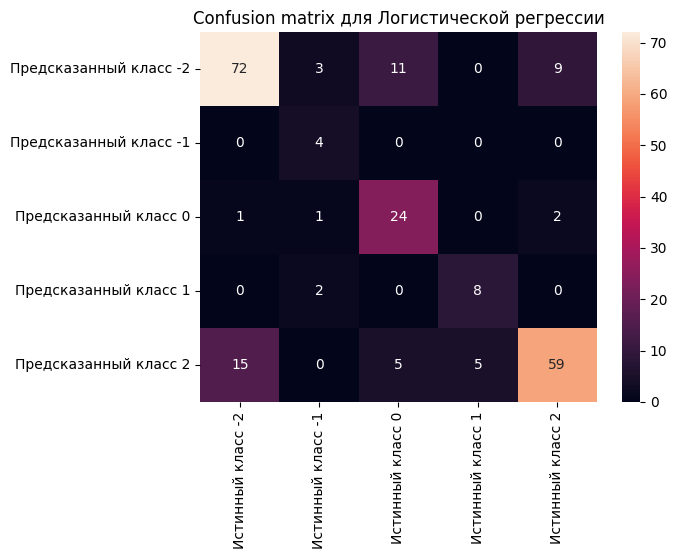

In [173]:
best_models = [(best2, 'Логистической регрессии'), (svc2, 'Метода опорных векторов'), (cat2, 'Градиентного бустинга'), (rf2, 'Случайного леса')]
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
grades = [-2, -1, 0, 1, 2]
def estimate(best2, name):
    plt.title(f'Confusion matrix для {name}')
    sns.heatmap(pd.DataFrame(confusion_matrix(best2.predict(X_test_cv_bigram), y_valid.astype(np.int64)),\
                            columns=['Истинный класс ' + str(grade) for grade in grades], index=['Предсказанный класс ' + str(grade) for grade in grades]), annot=True, fmt='')
estimate(*best_models[0])

In [177]:
model.eval()
all_predictions = []
all_labels = []
for batch in tqdm(test_dataloader, leave=False):
    preprocess_batch(batch)
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    true_labels = batch['labels']
    all_predictions.append(predictions)
    all_labels.append(true_labels)

  0%|          | 0/28 [00:00<?, ?it/s]

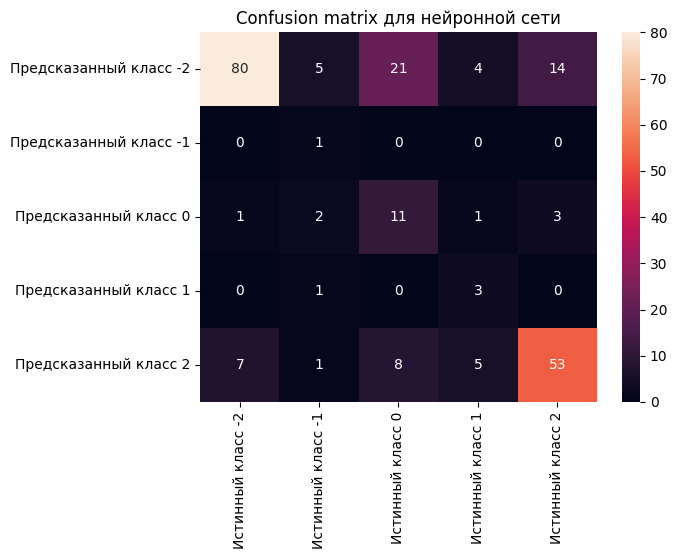

In [178]:
plt.title(f'Confusion matrix для нейронной сети')
sns.heatmap(pd.DataFrame(confusion_matrix(torch.cat(all_predictions).cpu(), torch.cat(all_labels).cpu()),\
                        columns=['Истинный класс ' + str(grade) for grade in grades], index=['Предсказанный класс ' + str(grade) for grade in grades]), annot=True, fmt='');

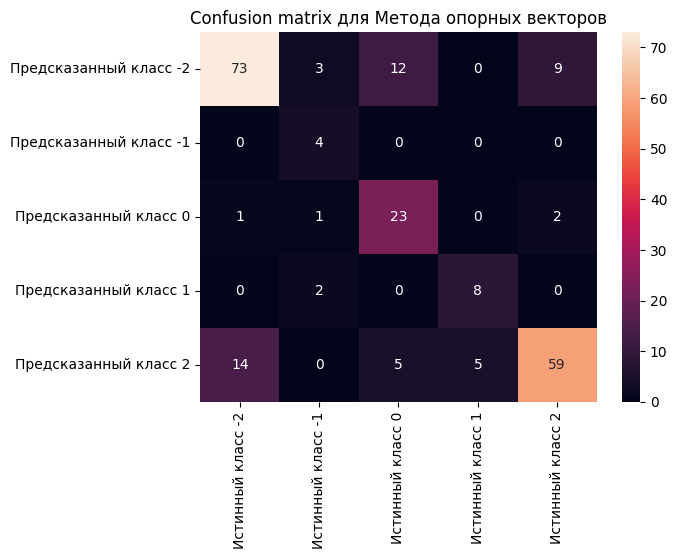

In [179]:
estimate(*best_models[1])

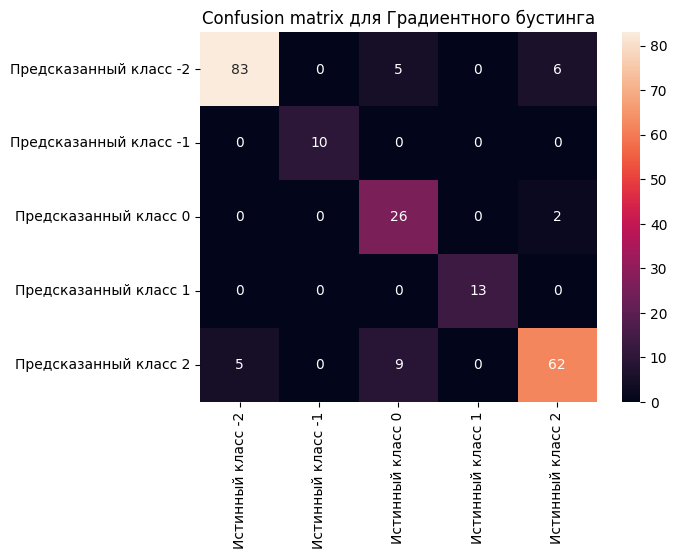

In [180]:
estimate(*best_models[2])

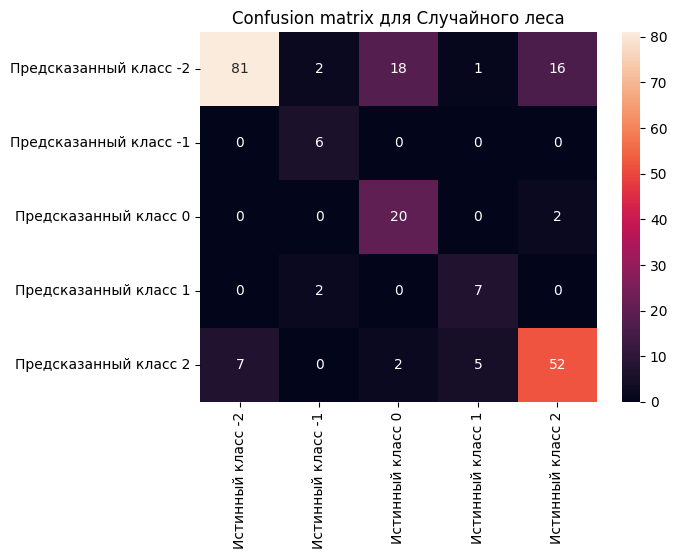

In [181]:
estimate(*best_models[3])

In [182]:
from sklearn.metrics import classification_report
def summarize(algo, name):
    print(f'Classification report для {name}')
    print(classification_report(algo.predict(X_test_cv_bigram), y_valid))

In [183]:
print(f'Classification report для нейронной сети')
print(classification_report(torch.cat(all_predictions).cpu(), torch.cat(all_labels).cpu()))

Classification report для нейронной сети
              precision    recall  f1-score   support

           0       0.91      0.65      0.75       124
           1       0.10      1.00      0.18         1
           2       0.28      0.61      0.38        18
           3       0.23      0.75      0.35         4
           4       0.76      0.72      0.74        74

    accuracy                           0.67       221
   macro avg       0.45      0.74      0.48       221
weighted avg       0.79      0.67      0.71       221



In [184]:
summarize(*best_models[0])

Classification report для Логистической регрессии
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        95
           1       0.40      1.00      0.57         4
           2       0.60      0.86      0.71        28
           3       0.62      0.80      0.70        10
           4       0.84      0.70      0.77        84

    accuracy                           0.76       221
   macro avg       0.66      0.82      0.71       221
weighted avg       0.78      0.76      0.76       221



In [185]:
summarize(*best_models[1])

Classification report для Метода опорных векторов
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        97
           1       0.40      1.00      0.57         4
           2       0.57      0.85      0.69        27
           3       0.62      0.80      0.70        10
           4       0.84      0.71      0.77        83

    accuracy                           0.76       221
   macro avg       0.65      0.82      0.70       221
weighted avg       0.79      0.76      0.76       221



In [186]:
summarize(*best_models[2])

Classification report для Градиентного бустинга
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        94
           1       1.00      1.00      1.00        10
           2       0.65      0.93      0.76        28
           3       1.00      1.00      1.00        13
           4       0.89      0.82      0.85        76

    accuracy                           0.88       221
   macro avg       0.90      0.93      0.91       221
weighted avg       0.89      0.88      0.88       221



In [187]:
summarize(*best_models[3])

Classification report для Случайного леса
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       118
           1       0.60      1.00      0.75         6
           2       0.50      0.91      0.65        22
           3       0.54      0.78      0.64         9
           4       0.74      0.79      0.76        66

    accuracy                           0.75       221
   macro avg       0.66      0.83      0.72       221
weighted avg       0.80      0.75      0.76       221



In [114]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_coefficients(classifier, feature_names, name, n_top_features=50, is_cb=False):
    coef = classifier.coef_.ravel() if not is_cb else classifier.get_feature_importance()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features] 
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    figure, axis = plt.subplots(1, 2, figsize=(20,15)) if not is_cb else plt.subplots(figsize=(20,15))
    axis[0].bar(np.arange(n_top_features), coef[positive_coefficients])
    axis[0].set_title(f"Топ {n_top_features} положительных слов в словаре эмоциональной окраски для {name}")
    if not is_cb:
        axis[1].bar(np.arange(n_top_features), abs(coef[negative_coefficients]))
        axis[1].set_title(f"Топ {n_top_features} негативных слов в словаре эмоциональной окраски для {name}")
    #axis[1].set_title(f"Топ 25 слов в словаре эмоциональной окраски для {name}")
    #plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    positive_coefficients %= len(feature_names)
    negative_coefficients %= len(feature_names)
    feature_names = np.array(feature_names)
    axis[0].set_xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );
    if not is_cb:
        axis[1].set_xticks(
            np.arange(1, 1 + n_top_features),
            feature_names[negative_coefficients],
            rotation=60,
            ha="right",
        );
    plt.show();

In [115]:
def visualize_catboost_coefficients(classifier, feature_names, name, n_top_features=50):
    coef = classifier.get_feature_importance()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    interesting_coefficients = positive_coefficients
    plt.figure(figsize=(15, 5))
    plt.bar(np.arange(n_top_features), coef[positive_coefficients])
    plt.title(f"Топ {n_top_features} важных {name} в словаре эмоциональной окраски")
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + n_top_features),
        feature_names[positive_coefficients],
        rotation=60,
        ha="right",
    );

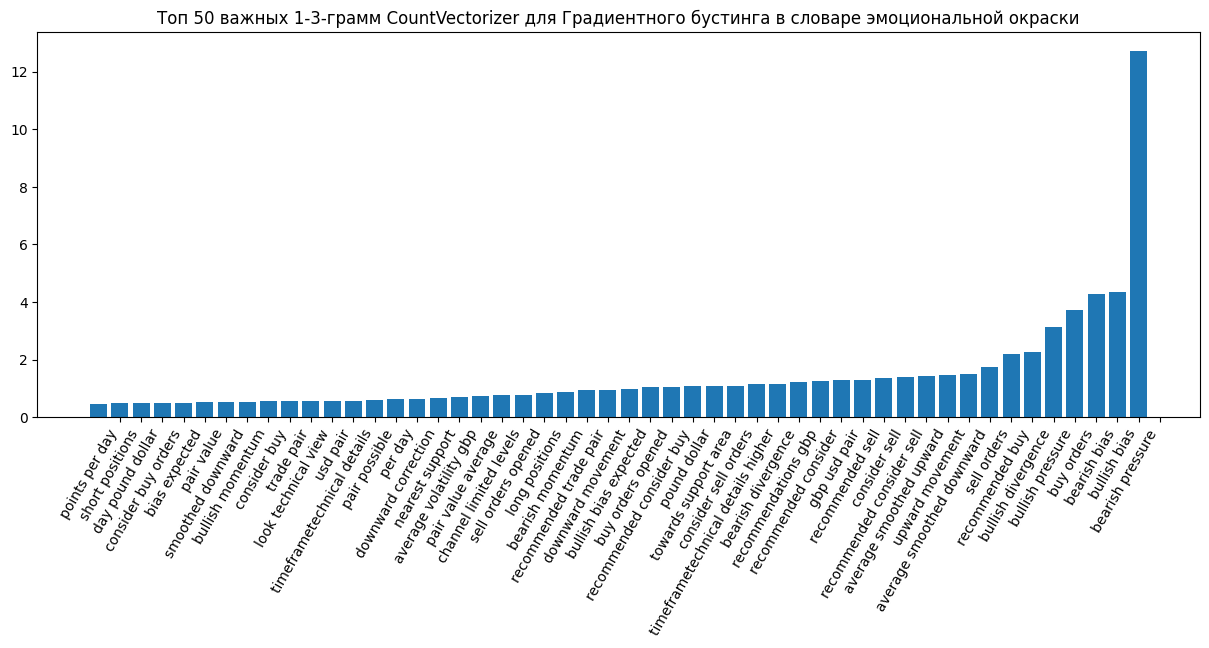

In [190]:
visualize_catboost_coefficients(cat2, cv_bigram.get_feature_names_out(), '1-3-грамм CountVectorizer для Градиентного бустинга')

<Figure size 1500x500 with 0 Axes>

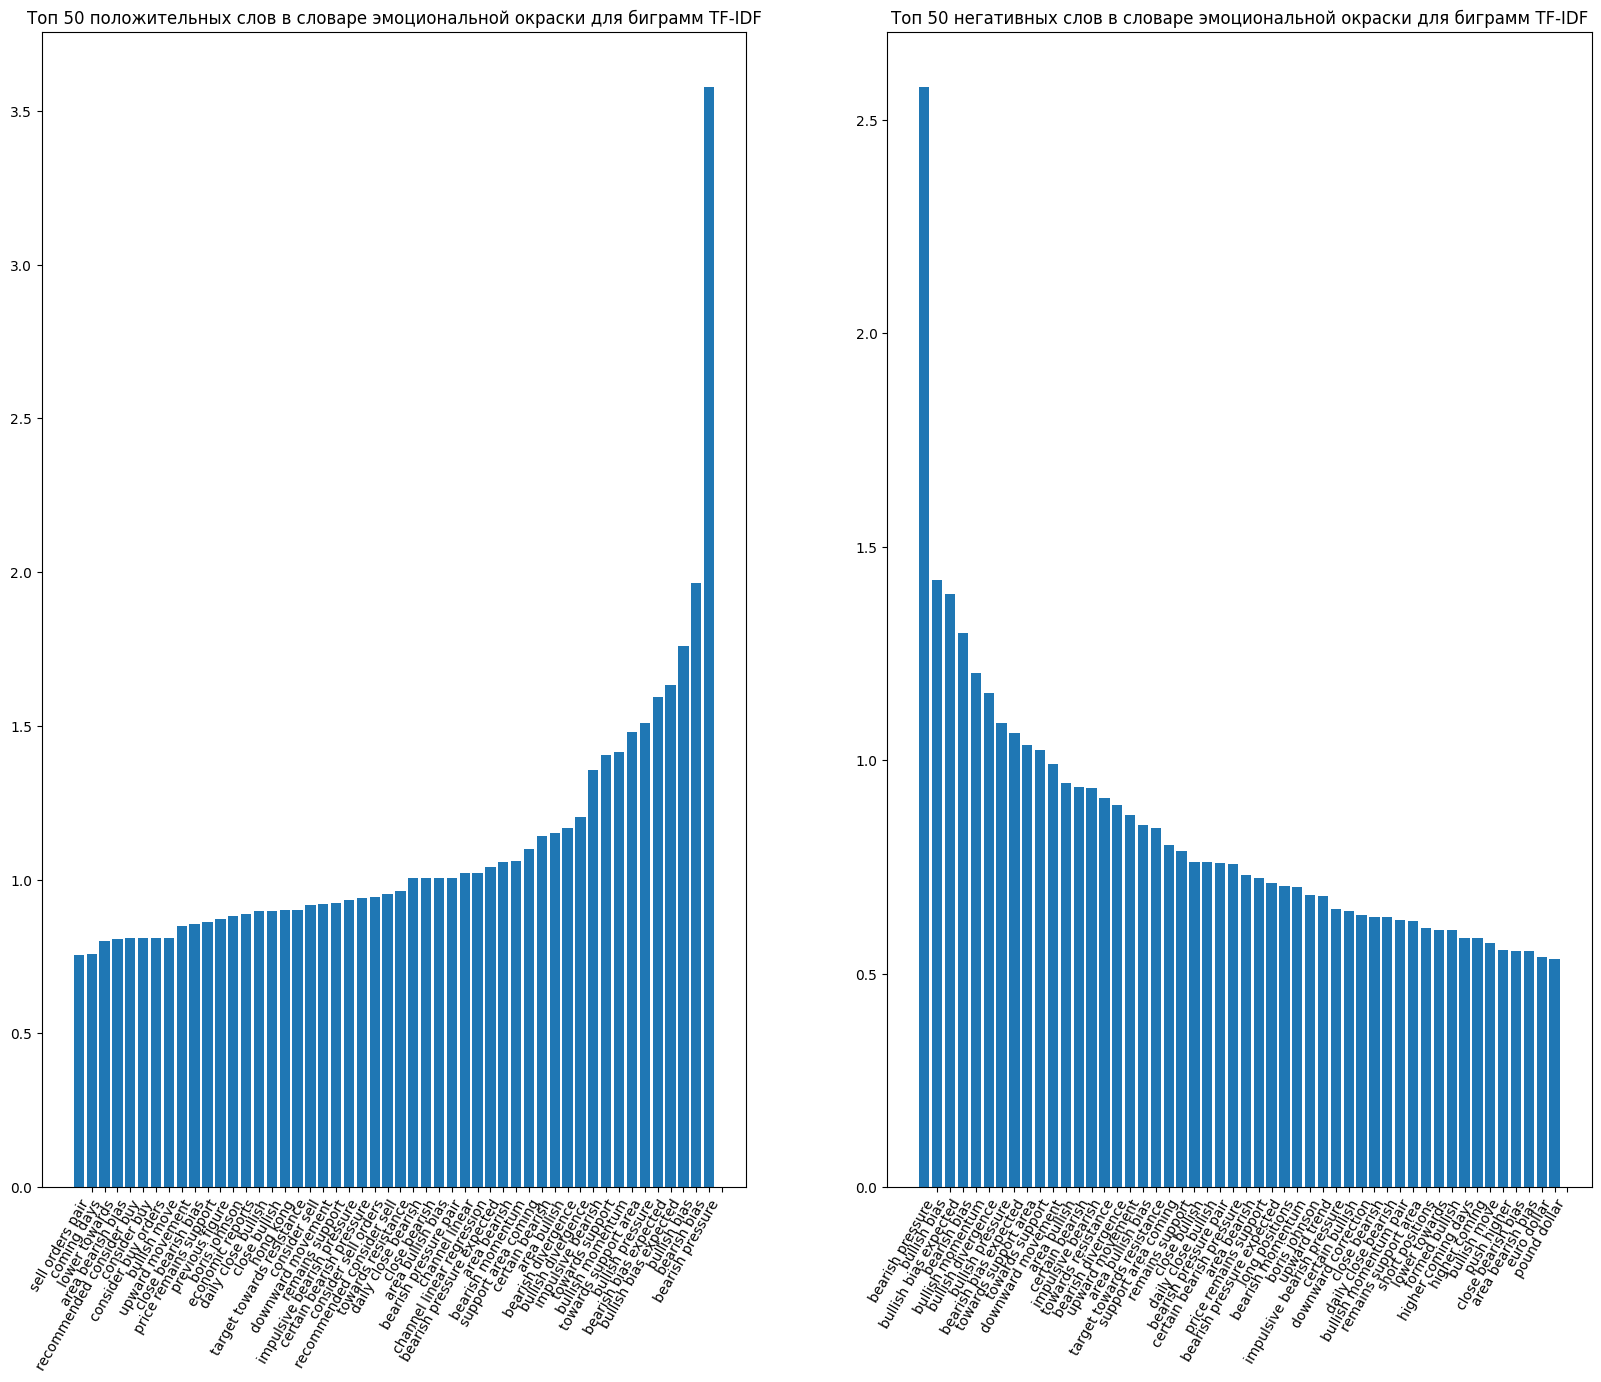

In [117]:
visualize_coefficients(best, tfid_bigram.get_feature_names_out(), 'биграмм TF-IDF')

<Figure size 1500x500 with 0 Axes>

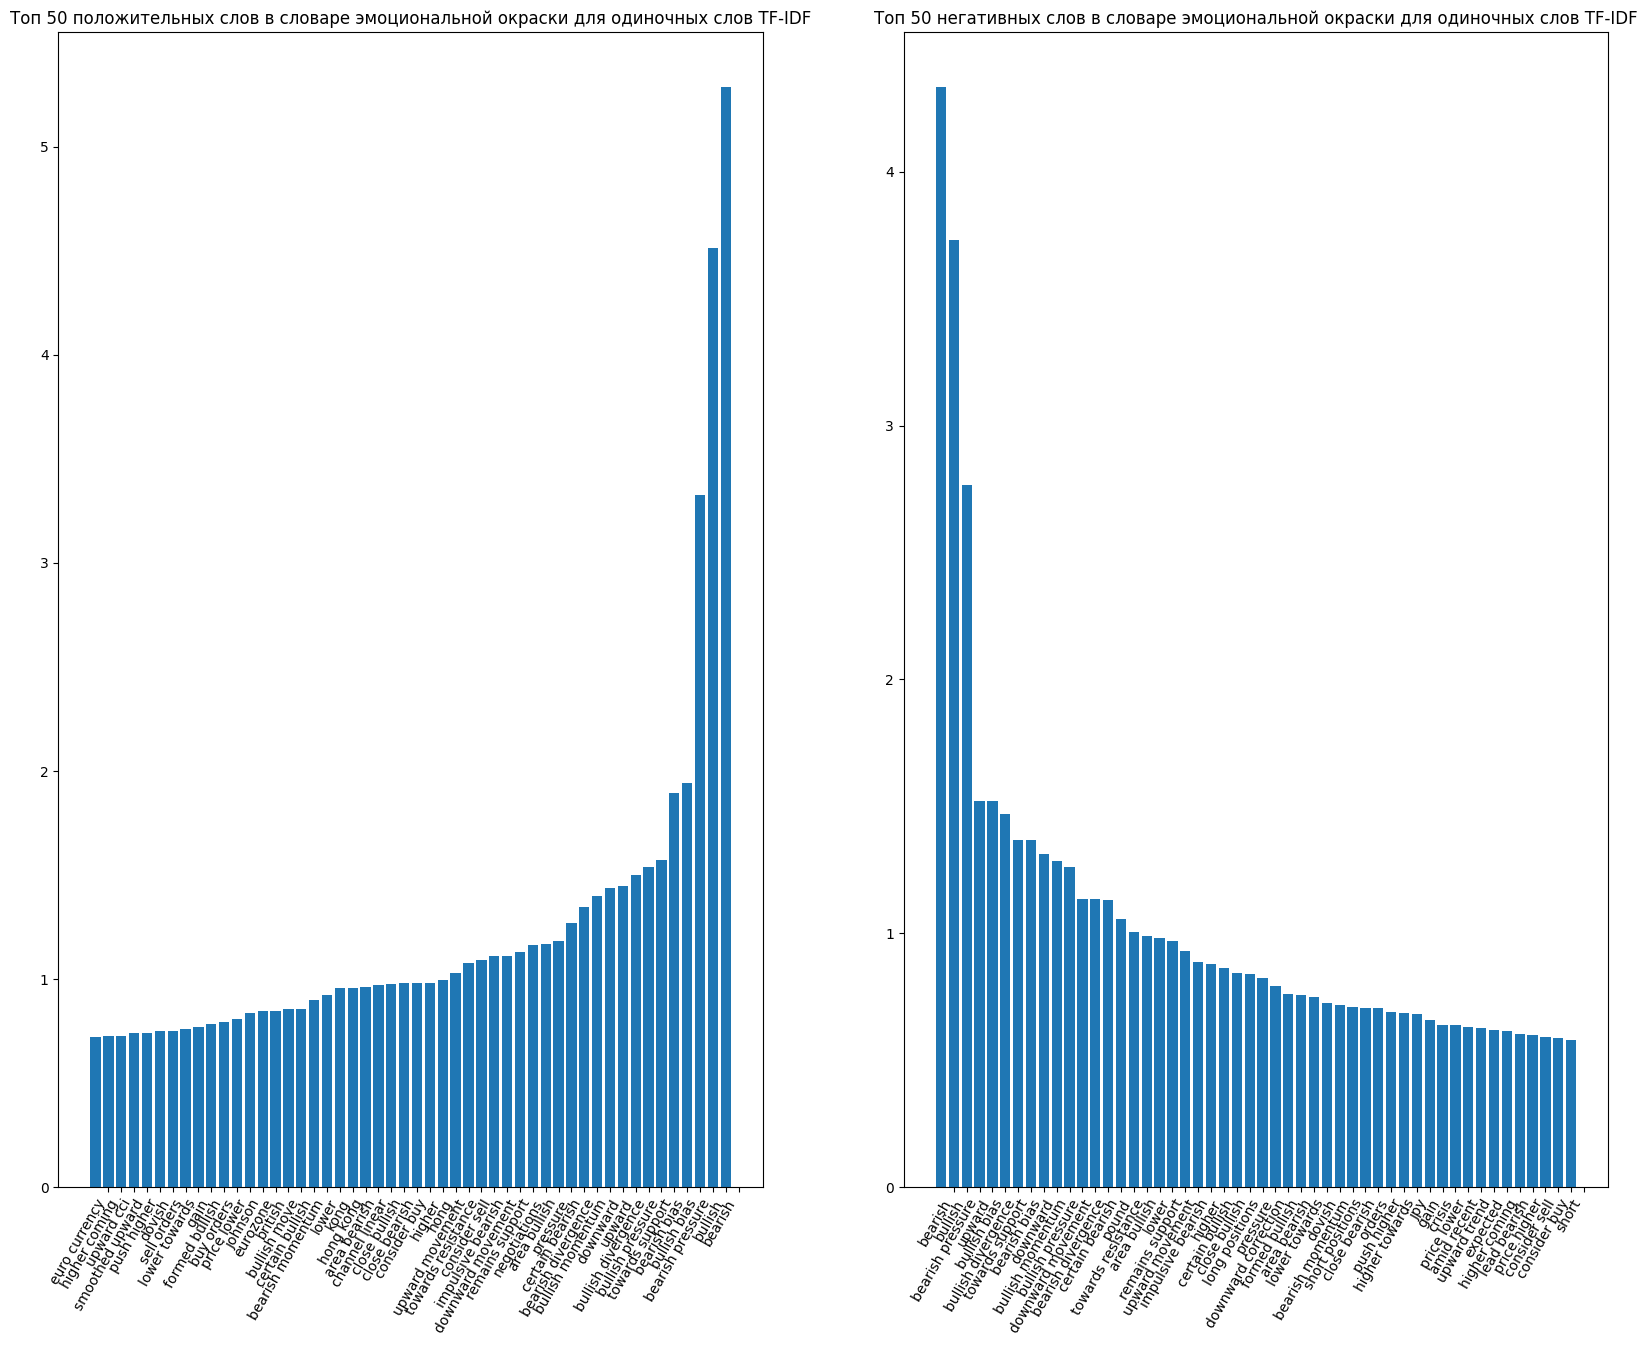

In [118]:
visualize_coefficients(best1, tfid_word.get_feature_names_out(), 'одиночных слов TF-IDF')

<Figure size 1500x500 with 0 Axes>

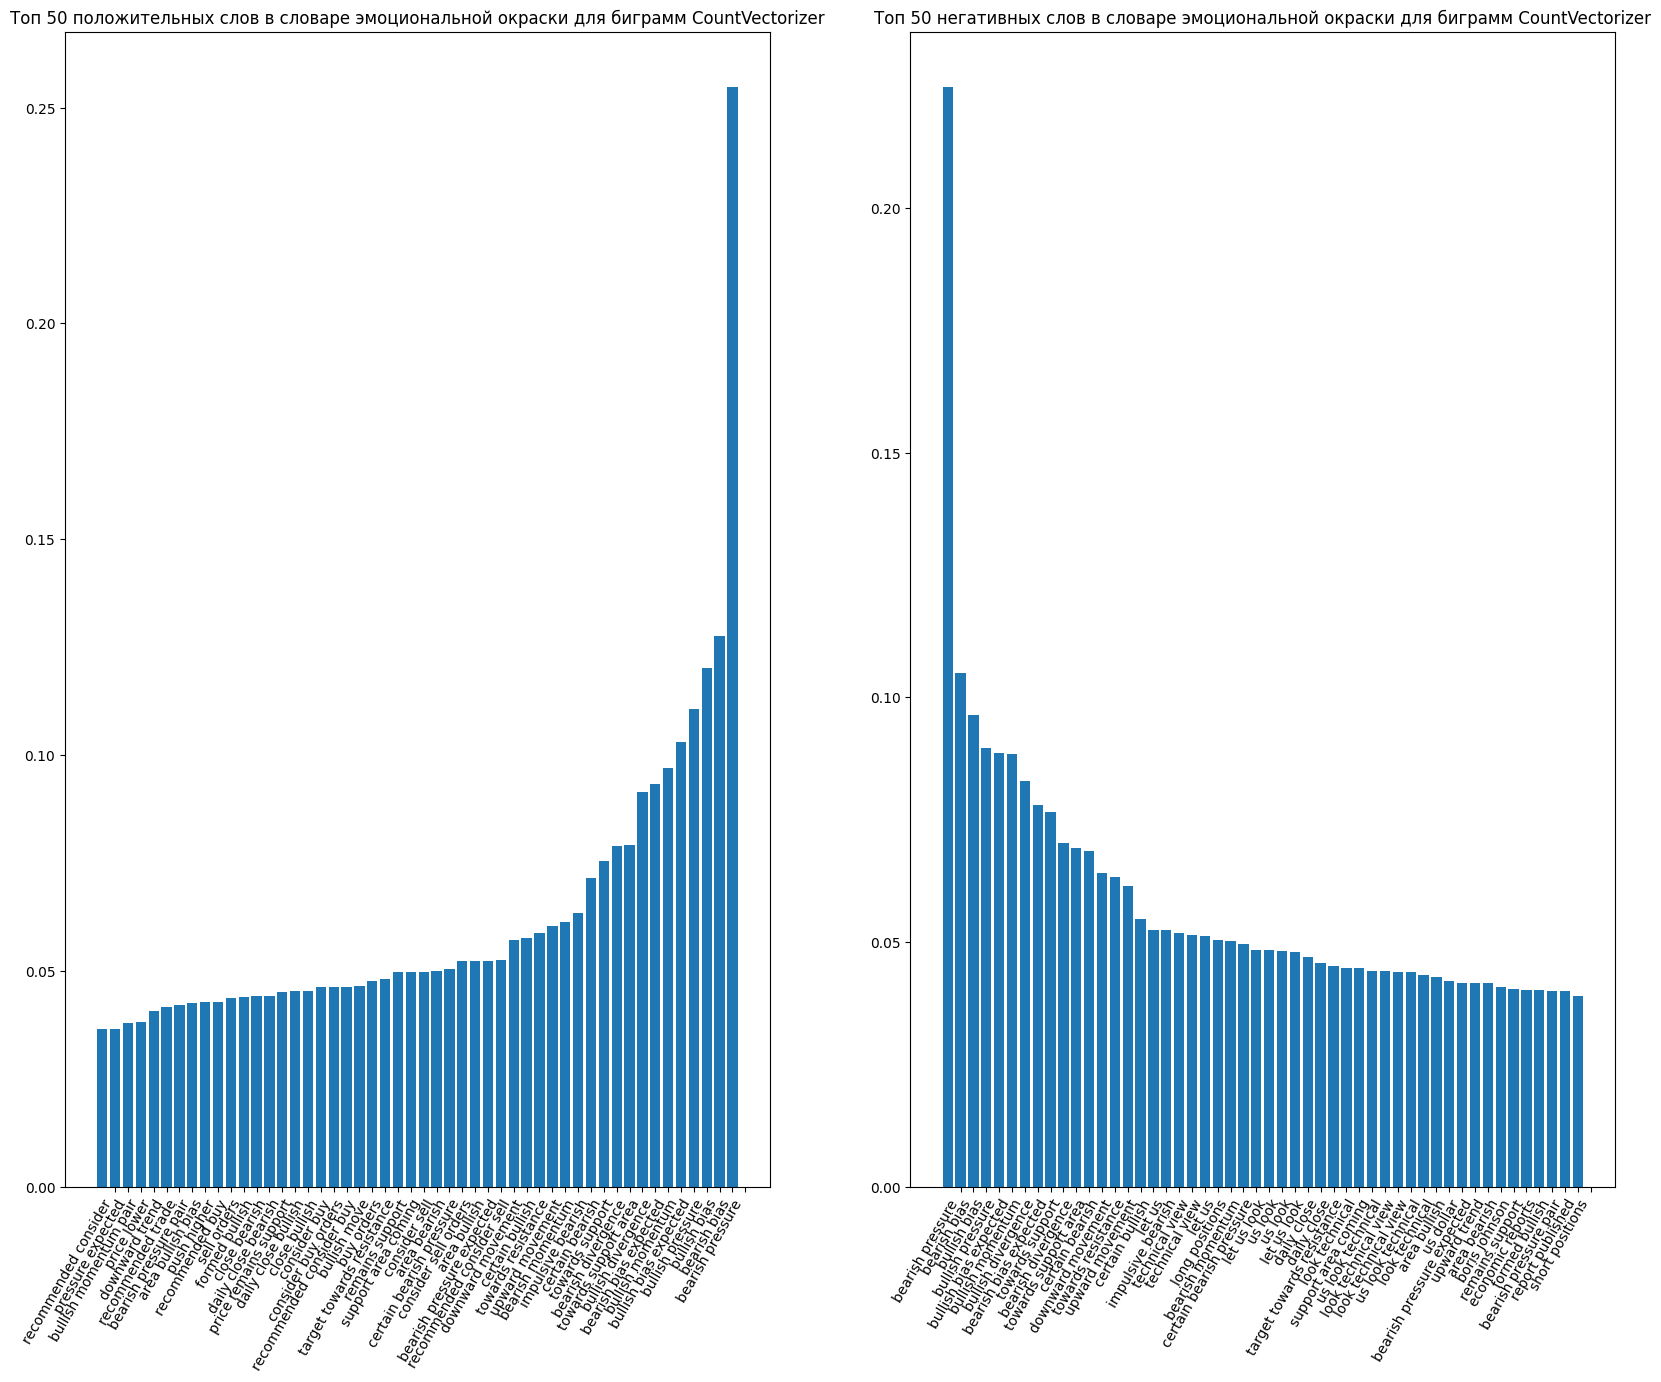

In [119]:
visualize_coefficients(best2, cv_bigram.get_feature_names_out(), 'биграмм CountVectorizer')

<Figure size 1500x500 with 0 Axes>

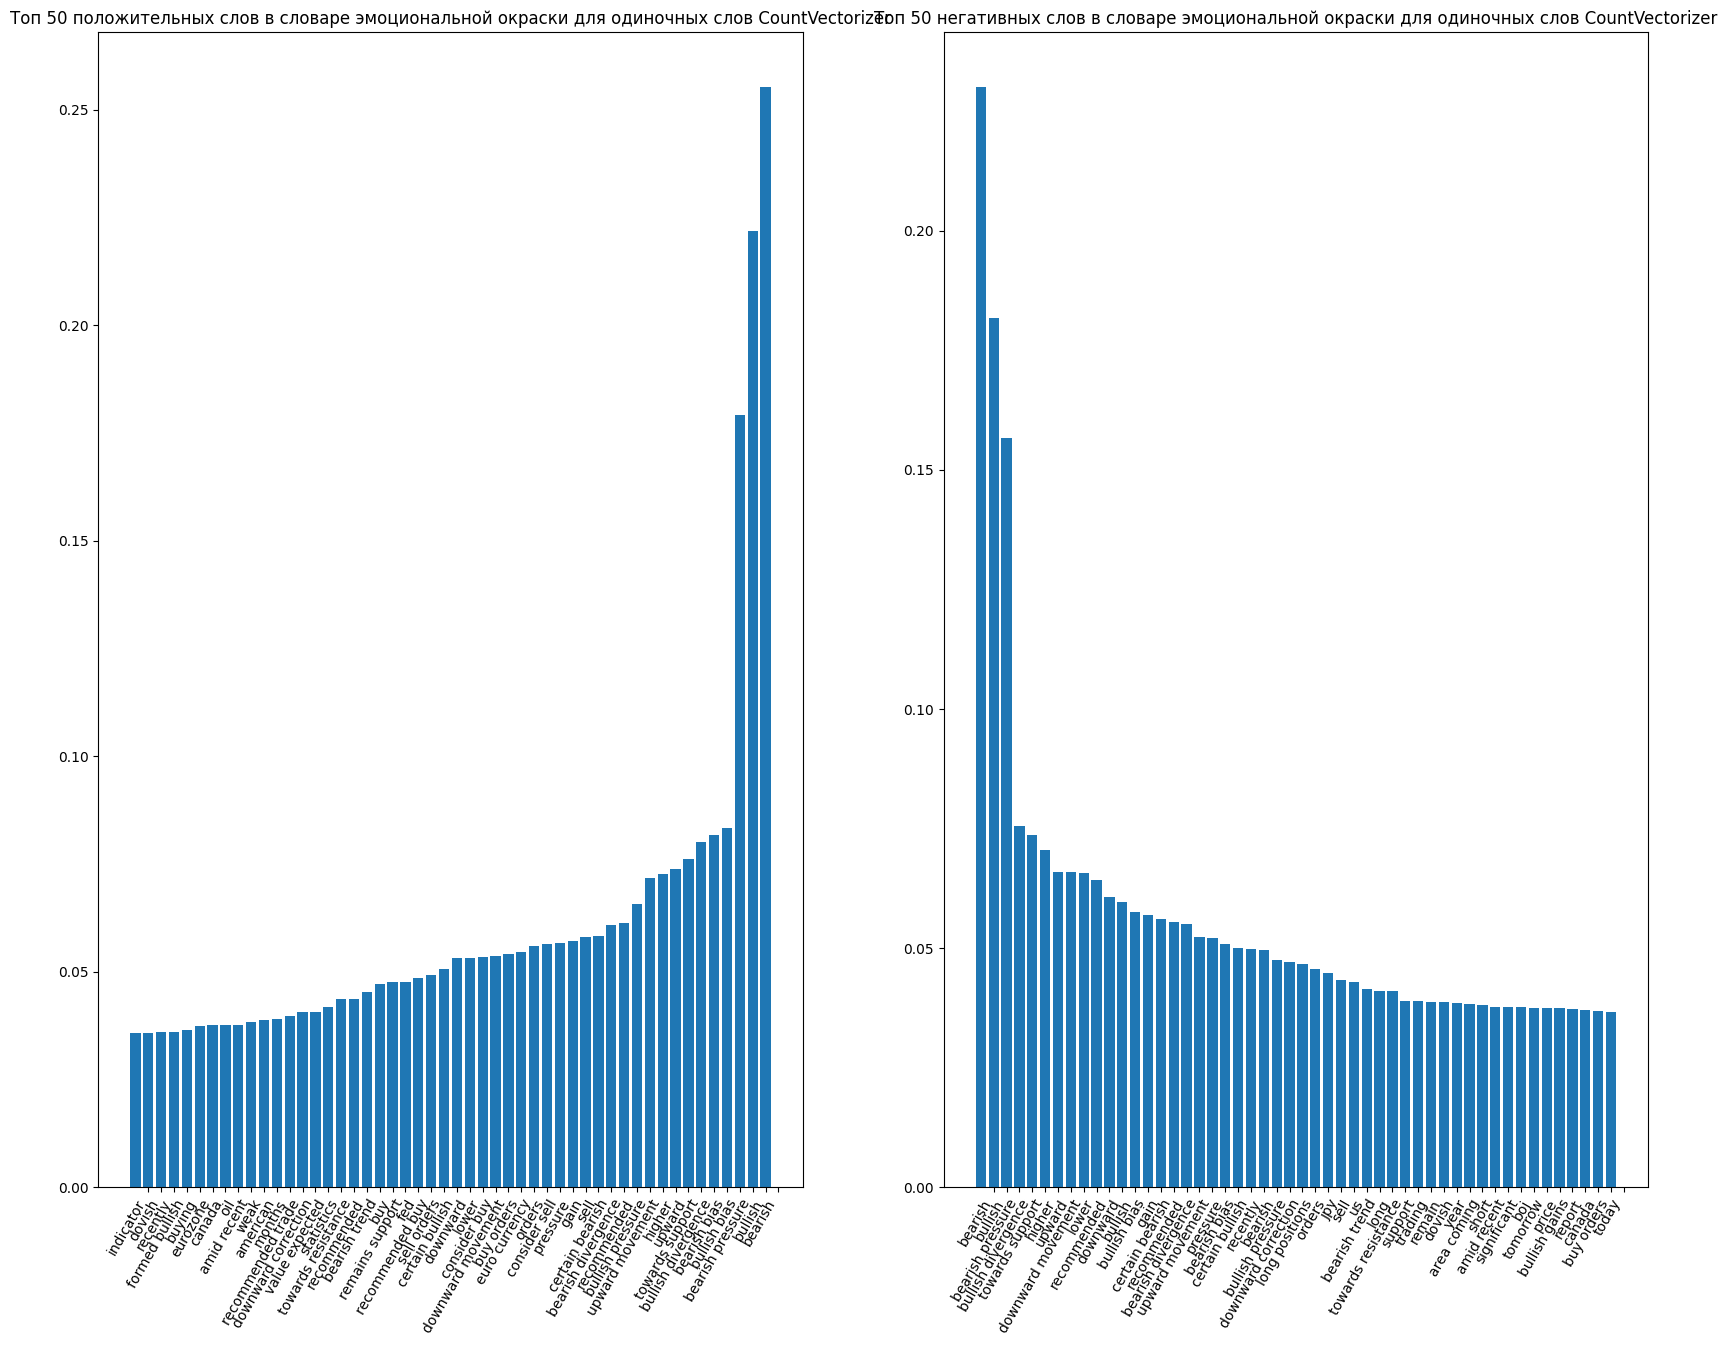

In [120]:
visualize_coefficients(best3, cv_word.get_feature_names_out(), 'одиночных слов CountVectorizer')

# Lexicon Based методы

In [124]:
def make_new_labels(t):
    if t < 0:
        return -1
    elif t > 0:
        return 1 
    else:
        return 0
mapped_labeles_data = labeled_data.copy()
mapped_labeles_data['labels'] = labeled_data['labels'].apply(make_new_labels)

## TextBlob

In [128]:
!pip install textblob

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.1 MB/s eta 0:00:0000:0100:01


In [129]:
from textblob import TextBlob

def f(func, t):
    l = func(t).sentiment[0]
    if l < 0:
        return -1
    elif l > 0:
        return 1
    else:
        return 0

text_blob_predictions = mapped_labeles_data[text].apply(lambda t: f(TextBlob, t))

In [130]:
d = mapped_labeles_data['labels']
print(f'f1_score {f1_score(text_blob_predictions, d, average="macro")}'), print(f'accuracy {accuracy_score(text_blob_predictions, d)}');

f1_score 0.3133938393839384
accuracy 0.44421768707482995


## SentiWordNet

In [136]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def get_sentiment_score_of_review(sentence):
    # 1. Tokenize
    tokens = nltk.word_tokenize(sentence)

    lemmatizer = WordNetLemmatizer()

    sentiment_score = 0.0
    for word in tokens:
        tag = get_wordnet_pos(word)
        item_res = lemmatizer.lemmatize(word, tag)
        if not item_res:
            continue
        
        synsets = wordnet.synsets(item_res, pos=tag)
        if len(synsets) == 0:
            continue
        
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment_score += swn_synset.pos_score() - swn_synset.neg_score()
        
    return sentiment_score

swn_prediction = labeled_data[text].apply(lambda t: make_new_labels(get_sentiment_score_of_review(t)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/zajtsevan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/zajtsevan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/zajtsevan/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [140]:
print(f'f1_score {f1_score(swn_prediction, d, average="macro")}'), print(f'accuracy {accuracy_score(swn_prediction, d)}');

f1_score 0.33883470313075154
accuracy 0.49455782312925173


## VADER

In [141]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import numpy as np
sia = SentimentIntensityAnalyzer()
def find_sentiment_vader(t, sia):
    g = sia.polarity_scores(t)
    map_sentiment = {
        'neg': -1,
        "neu": 0,
        "pos": 1
    }
    arr = []
    for key in map_sentiment:
        arr.append(g[key])
    return map_sentiment[list(map_sentiment.keys())[np.argmax(arr)]]
vader_prediction = labeled_data[text].apply(lambda t: find_sentiment_vader(t, sia))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/zajtsevan/nltk_data...


In [142]:
print(f'f1_score {f1_score(vader_prediction, d, average="macro")}'), print(f'accuracy {accuracy_score(vader_prediction, d)}');

f1_score 0.08678500986193294
accuracy 0.14965986394557823
